In [1]:
import numpy as np # 数组常用库
import pandas as pd # 读入csv常用库
from patsy import dmatrices # 可根据离散变量自动生成哑变量
from sklearn.linear_model import LogisticRegression # sk-learn库Logistic Regression模型
from sklearn.model_selection import train_test_split, cross_val_score # sk-learn库训练与测试
from sklearn import metrics # 生成各项测试指标库
import matplotlib.pyplot as plt # 画图常用库

In [4]:
data = pd.read_csv('C:/Users/tianjiayang/data_science_101/titanic_predicting/data/train.csv')

In [5]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
#删除有缺失值的行
#embarked Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton
data = data.drop(['Ticket', 'Cabin'], axis = 1)
data = data.dropna()

In [8]:
len(data.index)

712

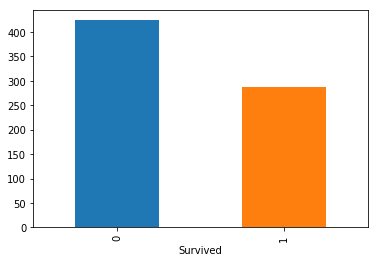

In [9]:
data.Survived.value_counts().plot(kind='bar')
plt.xlabel('Survived')
plt.show()

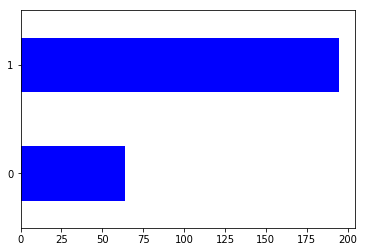

In [11]:
female = data.Survived[data.Sex == 'female'].value_counts().sort_index()
female.plot(kind='barh', color='blue', label='Female')
plt.show()

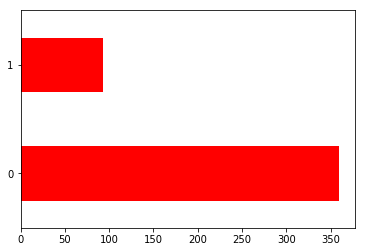

In [12]:
male = data.Survived[data.Sex == 'male'].value_counts().sort_index()
male.plot(kind='barh',label='Male', color='red')
plt.show()

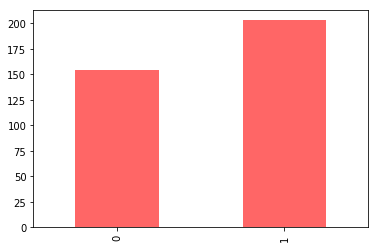

In [13]:

highclass = data.Survived[data.Pclass != 3].value_counts().sort_index()
highclass.plot(kind='bar',label='Highclass', color='red', alpha=0.6)
plt.show()

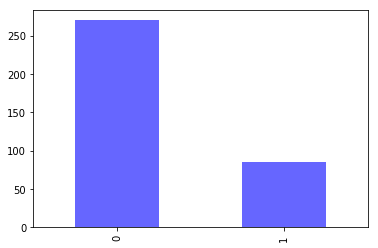

In [14]:
lowclass = data.Survived[data.Pclass == 3].value_counts().sort_index()
lowclass.plot(kind='bar',label='Highclass', color='Blue', alpha=0.6)
plt.show()

In [15]:
y, X = dmatrices('Survived~ C(Pclass) + C(Sex) + Age + C(Embarked)', data = data, return_type='dataframe')
y = np.ravel(y)

In [17]:
model = LogisticRegression()
model.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [18]:
model.score(X, y)

0.7935393258426966

	
coef_ : array, shape (1, n_features) or (n_classes, n_features)

Coefficient of the features in the decision function.

coef_ is of shape (1, n_features) when the given problem is binary.

In [19]:
pd.DataFrame(list(zip(X.columns, np.transpose(model.coef_))))

,0,1
0,Intercept,[1.7146144483060182]
1,C(Pclass)[T.2],[-0.8796488869838723]
2,C(Pclass)[T.3],[-2.0750167296520607]
3,C(Sex)[T.male],[-2.3246854011732805]
4,C(Embarked)[T.Q],[-0.5866266231853334]
5,C(Embarked)[T.S],[-0.42050534433527326]
6,Age,[-0.02961954879985259]


In [21]:
test_data = pd.read_csv('C:/Users/tianjiayang/data_science_101/titanic_predicting/data/test.csv')

In [22]:
test_data['Survived'] = 1
test_data.loc[np.isnan(test_data.Age), 'Age'] = np.mean(data['Age'])

In [23]:
ytest, Xtest = dmatrices('Survived~ C(Pclass) + C(Sex) + Age + C(Embarked)', data = test_data, return_type='dataframe')

In [24]:
pred = model.predict(Xtest).astype(int)
solution = pd.DataFrame(list(zip(test_data['PassengerId'], pred)), columns=['PassengerID', 'Survived'])

In [25]:
solution.to_csv('./my_prediction.csv', index = False)